In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [115]:
os.listdir('../input')
data = pd.read_csv("../input/creditcard.csv")

In [116]:
data.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [117]:
print(data.shape)

(284807, 31)


In [118]:
print(data.describe())

                Time            V1      ...               Amount          Class
count  284807.000000  2.848070e+05      ...        284807.000000  284807.000000
mean    94813.859575  3.919560e-15      ...            88.349619       0.001727
std     47488.145955  1.958696e+00      ...           250.120109       0.041527
min         0.000000 -5.640751e+01      ...             0.000000       0.000000
25%     54201.500000 -9.203734e-01      ...             5.600000       0.000000
50%     84692.000000  1.810880e-02      ...            22.000000       0.000000
75%    139320.500000  1.315642e+00      ...            77.165000       0.000000
max    172792.000000  2.454930e+00      ...         25691.160000       1.000000

[8 rows x 31 columns]


In [119]:
data  = data.sample(frac = 0.1)

In [120]:
print(data.shape)

(28481, 31)


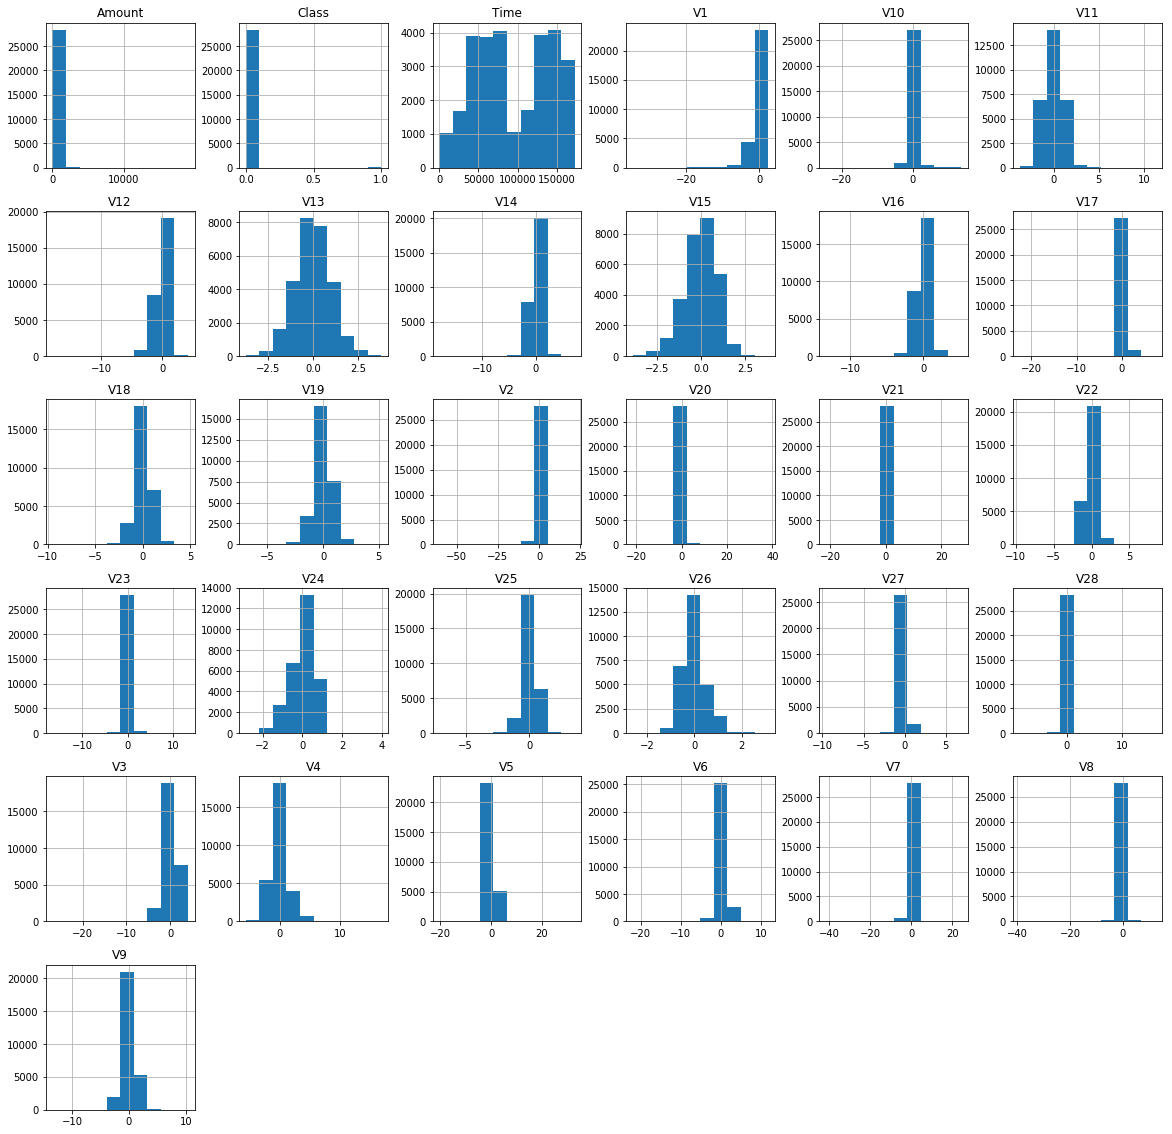

In [121]:
data.hist(figsize = (20,20))
plt.show()

In [122]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]


In [123]:
outlier_fraction = len(fraud) / float(len(valid))
print('Fraud Cases : ',len(fraud))
print('Valid Cases : ',len(valid))
print('Outlier Fraction : ',outlier_fraction)

Fraud Cases :  42
Valid Cases :  28439
Outlier Fraction :  0.0014768451773972363


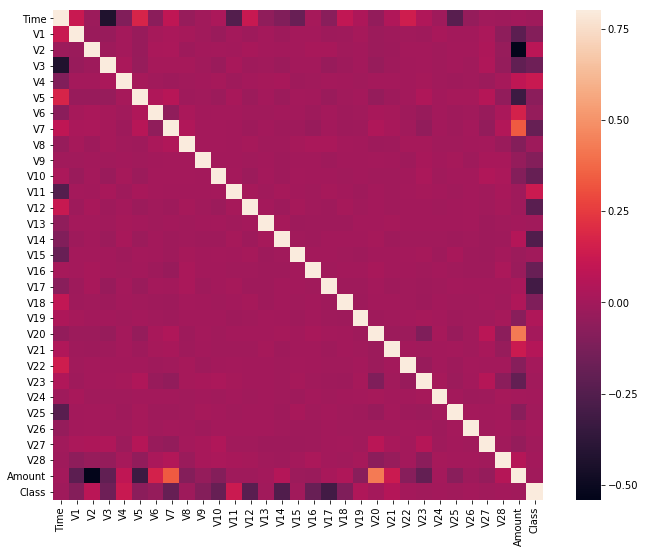

In [124]:
correlation_matrix = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(correlation_matrix,vmax = 0.8,square = True)
plt.show()

In [125]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [126]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [127]:
classifiers = { 'Isolation Forest': IsolationForest(max_samples = len(X),contamination =outlier_fraction),
                 'Local Outlier Factor': LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)
              }

In [128]:
num_outliers = len(fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    if clf_name == 'Local Outlier Factor':   
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else :
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    num_errors  = (y_pred != Y).sum()
    print('{} : {}'.format(clf_name,num_errors))
    print('Accuracy : ',accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest : 59
Accuracy :  0.9979284435237527
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28439
           1       0.30      0.31      0.31        42

    accuracy                           1.00     28481
   macro avg       0.65      0.65      0.65     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor : 85
Accuracy :  0.9970155542291352
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28439
           1       0.00      0.00      0.00        42

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481

